In [673]:
# install and load various packages
installed <- installed.packages()

if (!"scatterplot3d" %in% installed) {
    install.packages("scatterplot3d")
}

if (!"MASS" %in% installed) {
    install.packages("MASS")
}

if (!"car" %in% installed) {
    install.packages("car")
}

library("scatterplot3d")
library("MASS")
library("car")

# seed the rng for reproducibility
set.seed(9608)

## Fitting Linear Models

### Linear Models 
As you learned earlier, the general linear model is a flexible class of models capable of expressing many of the common statistical analyses you may have heard about in undergrad stats classes. Below I summarize a few of the common regression models you might encounter:


|            Name            	|                                        Model                                       	|                   R Syntax                   	|
|:--------------------------:	|:----------------------------------------------------------------------------------:	|:--------------------------------------------:	|
|        "Null" Model        	|                              $y = \bar{y} + \epsilon$                              	|              `lr.null = mean(y)`             	|
|  Simple Linear Regression  	|                       $y = \beta_0 + \beta_1 x_1 + \epsilon$                       	|            `lr.simple = lm(y ~ x)`           	|
| Multiple Linear Regression 	|            $y = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n + \epsilon$           	|      `lr.multi = lm(y ~ x1 + ... + xn)`      	|
| General Linear Model       	| $y_j = \beta_{0,j} + \beta_{1,j}x_{1} + \ldots +,\beta_{n,j} x_{n} + \epsilon_{j}$ 	| `lr.gen = lm(y1 + ... + yj ~ x1 + ... + xn)` 	|

where:
- $y_j$s are the values of the _response variable (DV)_ in your experiment
- $x_i$s are values of the _explanatory variables (IVs)_ in your experiment
- $\epsilon_i$s are random variables representing the _measurement error_ or _noise_ inherent in data collection
- $\beta_i$s are the learned _coefficients_ of the model

This table illustrates that:
- The *simple linear regression* model is a special case of the *multiple linear regression* model where we have only a single independent varaible. 
- Similarly, the *multiple linear regression* model is a special case of the *general linear model* where we have only a single dependent variable

### Matrix form

Observe that each of the regression models in the table above has essentially the same pattern: 

$$
y = \text{coefficient} \times \text{variable} + \text{constant}
$$

As you have seen, this sort of pattern can easily be expressed in matrix notation. Here we reproduce the above table using matrix and vector products:

|            Name            	|                Model              	|                   R Syntax                   	|
|:--------------------------:	|:----------------------------------------------------------------------:	|:--------------------------------------------:	|
|        "Null" Model        	| $\mathbf{y} = \bar{y}\mathbf{1} + \mathbf{e}$ 	|              `lr.null = mean(y)`             	|
|  Simple Linear Regression  	|    $\mathbf{y} = \beta_0\mathbf{1} + \beta_1\mathbf{x} + \mathbf{e}$   	|            `lr.simple = lm(y ~ x)`           	|
| Multiple Linear Regression 	|  $\mathbf{y} = \beta_0\mathbf{1} + \bf{X}\bf{b} + \mathbf{e}$  	|      `lr.multi = lm(y ~ x1 + ... + xn)`      	|
| General Linear Model       	| $\mathbf{Y} = \mathbf{b}_0 \odot \mathbf{1} + \mathbf{XB} + \mathbf{E}$        	| `lr.gen = lm(y1 + ... + yj ~ x1 + ... + xn)` 	|

Note that by convention we represent matrices with bold upper case letters and vectors with bold lowercase letters. The symbol $\odot$ is used to indicate _elementwise multiplication_, as opposed to matrix multiplication.

In the above formulas:
- $\mathbf{y}, \mathbf{Y}$ correspond to the observed values for the DVs in your model.
    * $\mathbf{y}$ is an $n \times 1$ vector (where $n$ is the number of datapoints in your dataset) of values for a single DV:
$$
\begin{bmatrix}
y_{1}\\
y_{2}\\ 
\vdots\\ 
y_{n}
\end{bmatrix}
$$
    * $\mathbf{Y}$ is an $n \times j$ matrix (where where $n$ is the number of observations in the dataset and $j$ is the number of DVs in your model) of observed DV values, organized as
$$ 
\begin{bmatrix}
y_{1,1} & \ldots &y_{1, j} \\
\vdots & \ddots & \vdots \\
y_{n,1} & \ldots &y_{n, j}
\end{bmatrix} 
$$
- $\mathbf{x}, \mathbf{X}$ correspond to the vector/matrix of IVs in the model.
    * $\mathbf{x}$ is a $n \times 1$ vector (where $n$ is the number of observations in the dataset) of datapoints for a single IV, organized as
$$
\begin{bmatrix}
x_{0}\\
x_{1}\\ 
\vdots\\ 
x_{n}
\end{bmatrix}
$$
    * $\mathbf{X}$ is a $n \times k$ vector (where $n$ is the number of observations in the dataset and $k$ is the number of IVs) of values for $k$ IVs, organized as
$$ 
\begin{bmatrix}
x_{1,1} & \ldots & x_{1, k} \\
\vdots & \ddots & \vdots \\
x_{n,1} & \ldots & x_{n, k}
\end{bmatrix} 
$$    
    
- $\beta_0 \mathbf{1}$, $\mathbf{b}_0 \odot \mathbf{1}$ correspond to the vector/matrix of intercept terms for each DV in the model. 
    * $\beta_0 \mathbf{1}$ is the product of the scalar intercept term $\beta_0$ and an $n \times 1$ vector (where $n$ is the number of observations in the dataset) of 1's, resulting in the vector: 
$$
\beta_0 \cdot         
\begin{bmatrix}
1\\
1\\ 
\vdots\\ 
1
\end{bmatrix} =
\begin{bmatrix}
\beta_{0}\\
\beta_{0}\\ 
\vdots\\ 
\beta_{0}
\end{bmatrix}
$$
    * $\mathbf{b}_0 \odot \mathbf{1}$ is the elementwise product of the $1 \times j$ vector of intercepts for the $j$ DVs in the model, $\mathbf{b}_0$, and a $n \times j$ matrix of 1's. This produces an $n \times j$ matrix (where where $n$ is the number of observations in the dataset and $j$ is the number of DVs we're predicting) organized as:
$$ 
\begin{bmatrix}
\beta_{0,1} & \ldots & \beta_{0, j}
\end{bmatrix} \odot\begin{bmatrix}
1 & \ldots & 1 \\
\vdots & \ddots & \vdots \\
1 & \ldots & 1
\end{bmatrix} = \begin{bmatrix}
\beta_{0,1} & \ldots &\beta_{0, j} \\
\vdots & \ddots & \vdots \\
\beta_{0,1} & \ldots & \beta_{0, j}
\end{bmatrix} 
$$

### One weird trick: The model matrix
Although the matrix-vector version of the linear models we've expressed above are correct, they're a bit unwieldy. In particular, the fact that we have to separate the intercept term from the rest of the coefficients makes the model seem way more complicated than it really is. It would be ideal if we could somehow consolidate things and include the intercept terms (i.e., the $\beta_0\mathbf{1}$ and $\mathbf{b}_0 \mathbf{1}$'s) within the rest of the coefficients (i.e., the $\mathbf{b}$ or $\mathbf{B}$). Using linear algebra, there's a very easy way to do this.

Notice that the intercept terms (i.e., the $\beta_0$'s) in the linear regression equations are just like all the other coefficient terms, except their datapoint (i.e., the $x$ value) is a constant always equal to $1$. That is, 

$$y = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n + \epsilon$$

is the same as writing

$$y = \beta_0 x_0 + \beta_1 x_1 + \ldots + \beta_n x_n + \epsilon \\ \text{where  } x_0 = 1$$

This implies that we can simply create a "dummy column" of 1's in our $\bf{X}$ matrix which correspond to this dummy $x_0$ value. This in turn will permit us to include the intercept variable, $\beta_0$, as just another entry in our $\bf{b}$ vector.


To make this a bit more explicit, here's the non-model matrix form of the multiple linear regression model:
![](./images/mlr2.png "Multiple linear regression")

and here's the equivalent model-matrix formulation:
![](./images/mlr1.png "Multiple linear regression")

Moving forward, we will assume the model-matrix form of the general linear model and drop the intercept terms from our model equations.

## Deriving the OLS Estimator

<div class="alert alert-warning">**N.B.** In this example we'll be working with the multiple regression model, $\mathbf{y} = \mathbf{Xb}+\mathbf{e}$. That said, everything we'll be doing applies just as well to any instance of the general linear model.</div>

### Error Functions
In multiple regression we are interested in finding values for the coefficients $\mathbf{b}$ that minimize the difference between the model's predicted values, $\hat{\mathbf{y}}$, and the actual values we've collected, $\mathbf{y}$. 

In order to make this tractable, we need a way to measure how good our predictions are. That is, we need an **error function**. In linear regression, we typically use the sum of the squared difference between the model predictions and the true values across the entire dataset. This is known as the **sum of squared error** or $SSE$:

$$SSE(\mathbf{y}, \hat{\mathbf{y}}) = \sum_{i=1}^j(y_i - \hat{y}_i)^2 $$

In matrix notation, this is

$$
\begin{align}
SSE(\mathbf{y}, \hat{\mathbf{y}}) &= || \mathbf{y} - \hat{\mathbf{y}}||^2 \\
&= || \mathbf{y} - \mathbf{Xb}||^2 
\end{align}
$$

where

$$|| \mathbf{x} || = \sqrt{ \mathbf{x}^\top \mathbf{x} } = \sqrt{ \sum_{i=1}^{j} x_i^2} $$

is called the **norm** of $\mathbf{x}$ (technically it is the $\ell_2$ **norm**).

### Function Minimization
Now that we have an error function we can go about finding the vector of coefficients $\mathbf{b}$ that achieves the lowest error. That is, we wish to find the vector $\hat{\mathbf{b}}$ that minimizes the sum of the squared difference between $\mathbf{X}\hat{\mathbf{b}}$ and $\mathbf{y}$.

Observe that the $SSE$ is a quadratic function in $\mathbf{b}$. Recall from calculus that one way of finding the minimum of a (positive) quadratic function is to find the point at which its derivative equals 0. This provides us with the strategy we will pursue to minimize the $SSE$:

1. Take the derivative of $SSE$ with respect to the coefficient vector $\mathbf{b}$
2. Set this value equal to 0.
3. Solve for $\hat{\mathbf{b}}$

#### Derivation
To start, let's write out the formula for $SSE$ in terms of the coefficient vector $\mathbf{b}$:

$$
\begin{align*}
SSE(\mathbf{y}, \hat{\mathbf{y}}) &= || \mathbf{y} - \hat{\mathbf{y}} ||^2 \\
&= ||\mathbf{y} - \mathbf{Xb}||^2 \\
&= (\mathbf{y} - \mathbf{Xb})^\top (\mathbf{y} - \mathbf{Xb}) \\
&= (\mathbf{y}^\top - \mathbf{b}^\top \mathbf{X}^\top )(\mathbf{y} - \mathbf{Xb}) &&\text{matrix product } (\mathbf{AB})^\top = \mathbf{B}^\top \mathbf{A}^\top \\
&= \mathbf{y}^\top \mathbf{y} - \mathbf{y}^\top \mathbf{Xb} - \mathbf{b}^\top \mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top \mathbf{b}^\top\mathbf{Xb}
\end{align*}
$$

Let's pause here for a moment to examine the terms $ \mathbf{y}^\top \mathbf{Xb}$ and $\mathbf{b}^\top \mathbf{X}^\top \mathbf{y}$. To begin, let's find the dimensionality of each term. Recall that:
- $\mathbf{y}$ is an $n \times 1$ vector
- $\mathbf{X}$ is an $n \times k$ matrix
- $\mathbf{b}$ is a $k \times 1$ vector

Using this information, we can see that both terms are just single scalar values. In particular, for $ \mathbf{y}^\top \mathbf{Xb}$, the inner product $\mathbf{y}^\top\mathbf{X}$ yields an $1 \times k$ vector, whose product with $\mathbf{b}$ yields a single number. Similarly, for $\mathbf{b}^\top \mathbf{X}^\top \mathbf{y}$ the inner product $\mathbf{b}^\top \mathbf{X}^\top$ yields a $1 \times n$ vector, whose product with $\mathbf{y}$ is also just a single number.

Let's dive a bit deeper. In non-matrix notation, $ \mathbf{y}^\top \mathbf{Xb}$ represents the operation:

$$
\begin{align}
\sum_{i=1}^{n} y_i  \left(\sum_{m=1}^{k} X_{i,m} b_m \right) = \sum_{i=1}^{n} \sum_{m=1}^{k} y_i X_{i,m} b_m
\end{align}
$$

For $\mathbf{X}^\top \mathbf{b}^\top \mathbf{y}$, the operation _exactly the same_:

$$
\begin{align}
\sum_{i=1}^{n} y_i \left(\sum_{m=1}^{k} b_m X_{i,m}  \right) = \sum_{i=1}^{n} \sum_{m=1}^{k} y_i X_{i,m} b_m
\end{align}
$$

Hence, we have that

$$\mathbf{X}^\top \mathbf{b}^\top \mathbf{y} = \mathbf{y}^\top \mathbf{Xb}$$

With this in mind, we can simplify our equation for $SSE$ to

$$SSE(\mathbf{y}, \hat{\mathbf{y}}) = \mathbf{y}^\top \mathbf{y} - 2 \mathbf{y}^\top \mathbf{Xb} + \mathbf{X}^\top \mathbf{b}^\top\mathbf{Xb}$$

Now that we have our equation for $SSE$ in terms of the coefficient vector $\mathbf{b}$, we can go about finding the (partial) derivative with respect to $\mathbf{b}$.

We have:

\begin{align*}
    \frac{\partial}{\partial \mathbf{b}} SSE &= \frac{\partial}{\partial \mathbf{b}} (\mathbf{y}^\top \mathbf{y} - 2 \mathbf{y}^\top \mathbf{Xb} + \mathbf{X}^\top \mathbf{b}^\top\mathbf{Xb}) \\
    &= -2 \mathbf{X}^\top \mathbf{y} + 2 \mathbf{X}^\top \mathbf{Xb}
\end{align*}

Now that we have the formula for the derivative with respect to $\mathbf{b}$, we can set it to 0 and solve for $\hat{\mathbf{b}}$:

$$
\begin{align*}
    0 = -2 \mathbf{X}^\top \mathbf{y} + 2 \mathbf{X}^\top \mathbf{Xb} \\
    \mathbf{X}^\top \mathbf{y} = \mathbf{X}^\top \mathbf{Xb}\\
    \hat{\mathbf{b}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}\\
\end{align*}
$$

Thus, we now have an analytic formula for the coefficients which minimize the $SSE$ given an arbitrary data matrix.

### Doing It R
We can implement this solution in R. To begin, let's generate some fake data:

In [674]:
k <- 2   # number of IVs
n <- 150 # number of datapoints

# sample mean and variances from a uniform 
# distribution over [0, 1]
means <- runif(k, min=0, max=1)

# create a k-by-k symmetric covariance matrix 
covariance <- matrix(rnorm(k^2, 0, 0.5), c(k, k))
covariance[lower.tri(covariance)] <- t(covariance)[lower.tri(covariance)]
covariance <- t(covariance) %*% covariance

# generate a fake dataset by sampling n observations from a 
# multivariate normal distribution
df <- mvrnorm(n, means, covariance)

# make df into a design matrix by adding a column of 1's
df <- cbind(rep.int(1, n), df)

# generate a vector of normally distributed noise from a
# normal distribution with mean 0 and variance 1
error <- rnorm(n, 0, 1) 

# sample the "true" coefficient values for our 
# regression model from a uniform distribution
# on [-1, 1]
beta_true <- runif(k + 1, min=-1, max=1)

# generate noisy observations of our DV
y <- df %*% beta_true + error

# convert df into a dataframe for plotting
df <- cbind(df, y)
df <- as.data.frame(df)
colnames(df) <- c("Intercept", "X1", "X2", "y")

# get some descriptive stats
summary(df)

   Intercept       X1                X2                y          
 Min.   :1   Min.   :-1.7572   Min.   :-2.8527   Min.   :-3.1037  
 1st Qu.:1   1st Qu.:-0.2100   1st Qu.:-0.2834   1st Qu.: 0.1179  
 Median :1   Median : 0.3871   Median : 0.4861   Median : 0.6277  
 Mean   :1   Mean   : 0.3668   Mean   : 0.4123   Mean   : 0.7847  
 3rd Qu.:1   3rd Qu.: 0.8785   3rd Qu.: 1.1391   3rd Qu.: 1.6227  
 Max.   :1   Max.   : 2.7309   Max.   : 2.5000   Max.   : 4.2996  

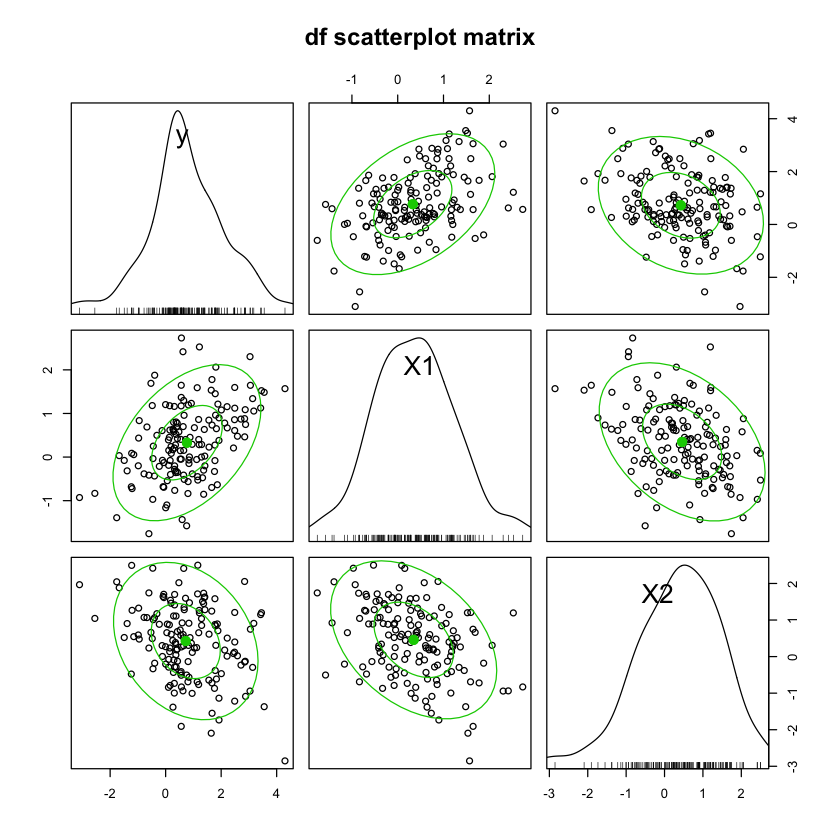

In [675]:
# scatterplot matrix for pairwise comparisons
scatterplotMatrix(~ y + X1 + X2, 
                  data = df, 
                  ellipse = TRUE,
                  diagonal = "density",
                  smoother = FALSE,
                  reg.line = FALSE,
                  main = "df scatterplot matrix")

Now we're ready to implement the equation for $\hat{\mathbf{b}}$ we derived above.

In [676]:
# Create the appropriate matrices from our dataframe
X <- cbind(df$Intercept, df$X1, df$X2)
y <- as.matrix(df$y)
X.T <- t(X)

# solve for beta_hat
# beta_hat = (X^T X)^(-1) * X^T y
beta_hat <- solve(X.T %*% X) %*% X.T %*% y

Now let's visualize the regression fit associated with the coefficients we solved for:

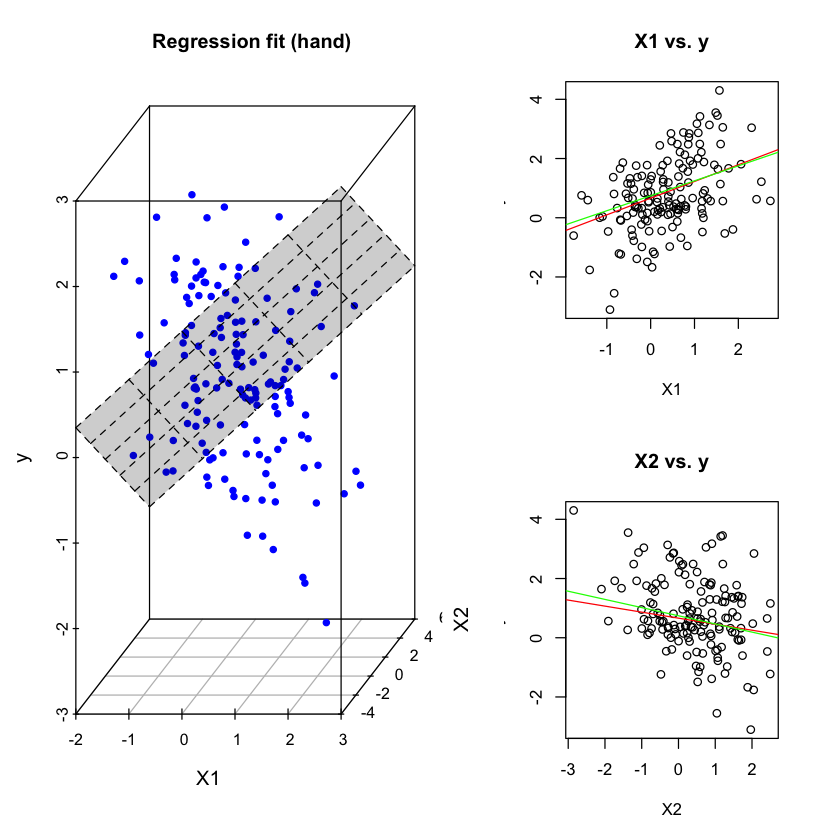

In [681]:
layout(matrix(c(1, 2, 1, 3), 2, 2, byrow = TRUE), 
       widths = c(1.5, 1, 1.5, 1), 
       heights = c(2, 2, 1, 1))

# plot the regression fit associated with beta_hat
plt.fit <- scatterplot3d(x = df$X1, 
                         y = df$y, 
                         z = df$X2,
                         xlab = "X1",
                         ylab = "X2",
                         zlab = "y",
                         pch = 19,
                         scale.y = 0.5,
                         color = 'blue',
                         main = "Regression fit (hand)")
plt.fit$plane3d(beta_hat, draw_polygon = TRUE)

# create a scatter plot for X1 vs. y with the regression 
# fit in red and true function in green
plot(df$X1, df$y, xlab = 'X1', ylab = 'y', main = 'X1 vs. y')
abline(beta_hat[1], beta_hat[2], col = 'red')
abline(beta_true[1], beta_true[2], col = 'green')

# create a scatter plot for X2 vs. y with the regression 
# fit in red and true function in green
plot(df$X2, df$y, xlab = 'X2', ylab = 'y', main = 'X2 vs. y')
abline(beta_hat[1], beta_hat[3], col = 'red')
abline(beta_true[1], beta_true[3], col = 'green')

We can compare these results to the results we arrive at when we use R's `lm` function:

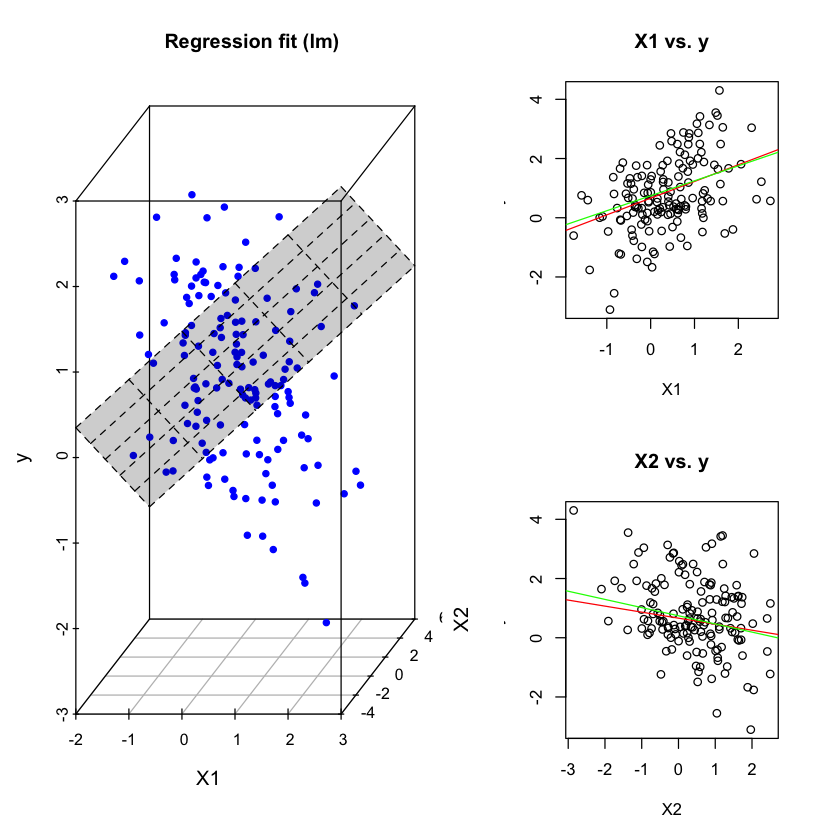

In [678]:
# generate regression fits using the lm command to verify
# we get the same answer
my.lm <- lm(y ~ X1 + X2, data=df)

layout(matrix(c(1,2,1,3), 2, 2, byrow = TRUE), 
       widths=c(1.5,1,1.5,1), 
       heights=c(2, 2, 1, 1))

plt.fit2 <- scatterplot3d(x = df$X1, 
                          y = df$y, 
                          z = df$X2,
                          xlab = "X1",
                          ylab = "X2",
                          zlab = "y",
                          pch = 19,
                          scale.y = 0.5,
                          color = 'blue',
                          main = "Regression fit (lm)")
plt.fit2$plane3d(my.lm, draw_polygon = TRUE)

# extract coefficients from lm call
lmcoefs <- my.lm$coefficients

# create a scatter plot for X1 vs. y with the regression 
# fit in red and true function in green
plot(df$X1, df$y, xlab = 'X1', ylab = 'y', main='X1 vs. y')
abline(lmcoefs[1], lmcoefs[2], col = 'red')
abline(beta_true[1], beta_true[2], col = 'green')

# create a scatter plot for X2 vs. y with the regression 
# fit in red and true function in green
plot(df$X2, df$y, xlab = 'X2', ylab = 'y', main='X2 vs. y')
abline(lmcoefs[1], lmcoefs[3], col = 'red')
abline(beta_true[1], beta_true[3], col='green')

In [679]:
# verify that we arrived at the same values
cat('Coefficients found using R\'s lm command: \n', lmcoefs)
cat('\n\nCoefficients found "by hand:" \n', beta_hat)
cat('\n\nTrue coefficients:\n', beta_true)

Coefficients found using R's lm command: 
 0.6618337 0.5637807 -0.2036367

Coefficients found "by hand:" 
 0.6618337 0.5637807 -0.2036367

True coefficients:
 0.742738 0.5053569 -0.2762227